# Normalization

Data normalization is a very important aspect when the data is suppposed to be an input to a deep neural network(DNN). Uneven distribution or range of different parameters can lead to bias while learning the weights of the DNN. In the case of compression, biasness can lead to poor reconstructions of some variables, mainly the one having lower numerical range. Hence normalization should be performed appropriately to avoid these errors.

## Description

This notebook contains the scripts to perform normalization on the data.  We explore two types of normalization: Standard normalization and Custom normalization

### Import packages

In [1]:
import sys
BIN = 'utils/'
sys.path.append(BIN)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import my_matplotlib_style as ms
mpl.rc_file(BIN + 'my_matplotlib_rcparams')

import utils
import fastai
%matplotlib inline

## Load data

In [2]:
train = pd.read_pickle('../datasets/all_jets_train_4D_100_percent.pkl')
original_train_shape = train.shape
print('Original train shape:', original_train_shape)

test = pd.read_pickle('../datasets/all_jets_test_4D_100_percent.pkl')
print('Original test shape:', test.shape)

Original train shape: (111778, 4)
Original test shape: (27945, 4)


### Parameters being considered

In [3]:
for key in train.keys():
    print(key)

m
pt
phi
eta


### Convert m and pt to GeV

In [4]:
train['m'] = train['m'] / 1000.
train['pt'] = train['pt'] / 1000.
test['m'] = test['m'] / 1000. 
test['pt'] = test['pt'] / 1000. 

### Jets appear to have zero mass: 
This can be added as a filter while performing jet cleaning, however I did not filter these jets..

In [5]:
print(np.sum(train['m']==0))

257


## Visualise the pre-normalization data distribution

In [6]:
def plot_all(data, logy=False, title=''):
    plt.rcParams['figure.figsize'] = [18, 12]
    plt.figure()
    plt.suptitle(title)
    count = 1
    for key in data.keys():
        plt.subplot(2,2,count)        
        plt.hist(data[key], bins=200)
        plt.xlabel(str(key))
        plt.ylabel('Number of jets')
        count += 1
        if logy:
            plt.yscale('log')
        else:
            ms.sciy()

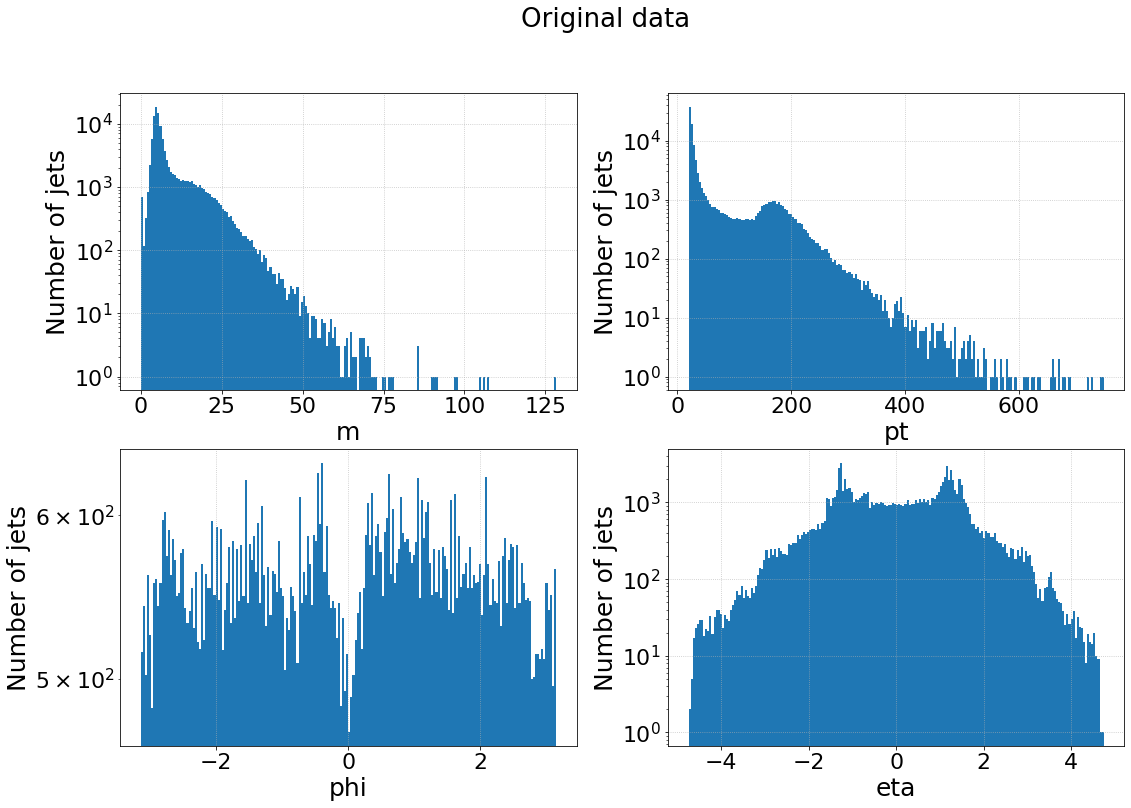

In [7]:
logy = True
plot_all(train, logy, title="Original data")

## Standard normalization

Parameters for custom normalization:
        \begin{equation}
               x = \frac{x - \mu_x}{\sigma_x}; \\
        x \in [m, p_t, \eta, \phi]
        \end{equation}
        

In [8]:
# Compute normalization parameters
train_mean = train.mean()
train_std = train.std()

In [9]:
std_normalized_train = (train - train_mean) / train_std
std_normalized_test = (test - train_mean) / train_std

## Data distribution after standard normalization

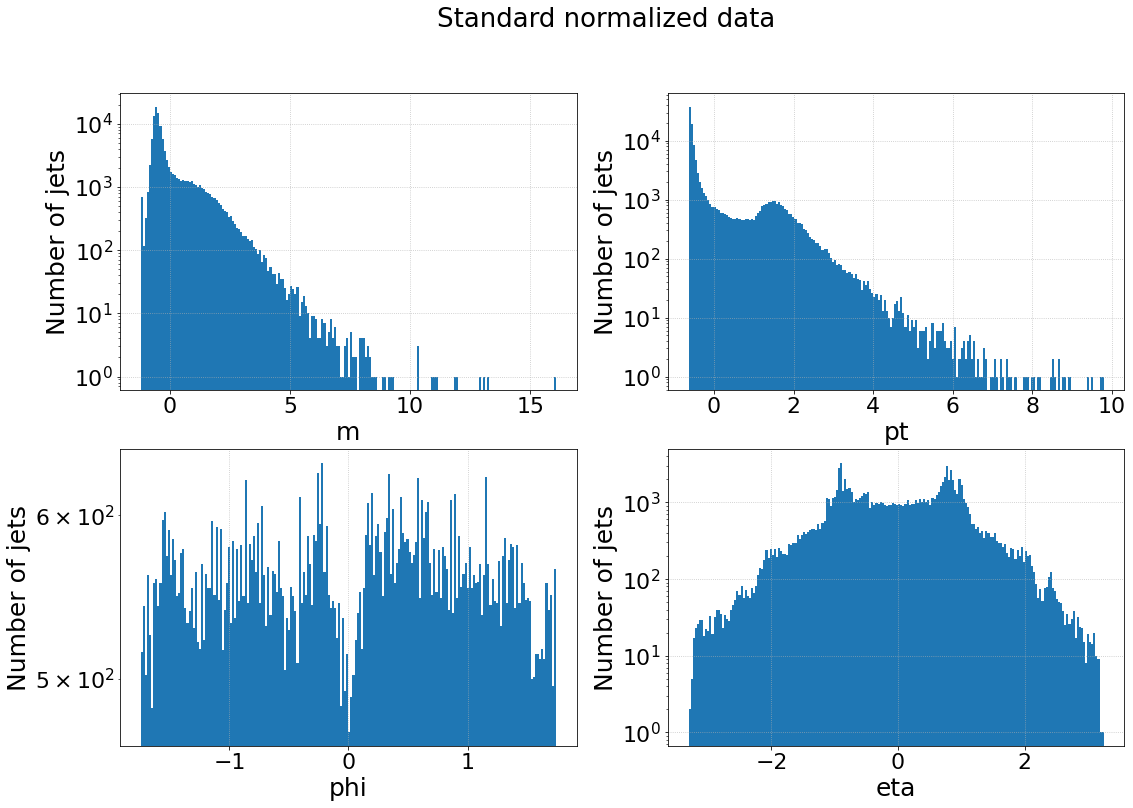

In [10]:
logy = True
plot_all(std_normalized_train, logy, title="Standard normalized data")

## Custom Normalization

Parameters for custom normalization:
        \begin{equation}
                m \xrightarrow . ([log_{10}(m / 1000) ]  + 1) / 1.8 \\
                p_t \xrightarrow . ([log_{10}(p_t / 1000) ]  - 1.3) / 1.2 \\
                \eta \xrightarrow . \eta / 5 \\
                \phi \xrightarrow . \phi / 3 \\
        \end{equation}

In [11]:
# <--- Modifications done in utils.py file -->
custom_normalized_train, custom_normalized_test = utils.custom_normalization(train, test)
unnormalized_test = utils.custom_unnormalize(custom_normalized_test)

In [12]:
# Checking if normalizing and unnormalizing works
(np.abs(test - unnormalized_test) < 1e-10).all()

m      True
pt     True
phi    True
eta    True
dtype: bool

## Data distribution after custom normalization

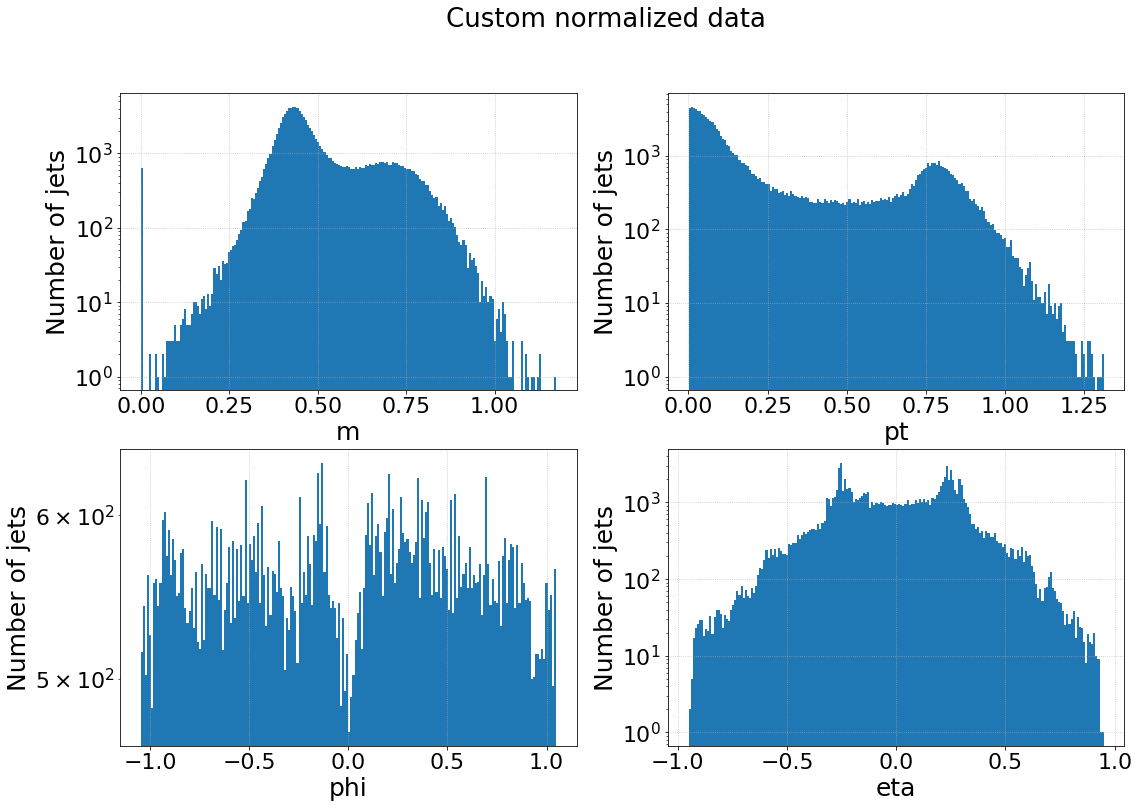

In [13]:
logy = True
plot_all(custom_normalized_train, logy, title="Custom normalized data")

## Observation
Custom normalization brings the range of the parameters much closer as compared to standard normaliation. But just by visual inspection, we can observe that the data distribution after custom normalization seems to be different from the original data distribution.

Although, how this affects the compression can only be found out by training the autoencoder on these differently normalized data.

## Save the normalized files

In [14]:
std_normalized_train.to_pickle('../datasets/std_normalized_train_4D_100_percent')
std_normalized_test.to_pickle('../datasets/std_normalized_test_4D_100_percent')

In [15]:
custom_normalized_train.to_pickle('../datasets/custom_normalized_train_4D_100_percent')
custom_normalized_test.to_pickle('../datasets/custom_normalized_test_4D_100_percent')

In [16]:
train.to_pickle('../datasets/non_normalized_train_4D_100_percent')
test.to_pickle('../datasets/non_normalized_test_4D_100_percent')